In [1]:
!pip install torch

In [2]:
import torch.nn as nn
import torch.utils
import torch.utils.data as utdata
import torchvision

import torch.optim as optim
from torchvision.transforms import ToTensor
import glob
from torchvision import datasets , transforms
import matplotlib.pyplot as plot
import os
import os.path as path
import torch.nn.functional as F


In [49]:
import math
class MyDataset(utdata.Dataset):
    def __init__(self, label , img_dir,train_mode = True , train_test_ratio =0.8 , transform=None, target_transform=None):
        self.label = label
        self.img_dir = img_dir
        self.transform = transform
        ls =glob.glob(path.join(img_dir, "*.jpg"))
        n = ls.__len__()
        if train_mode:
          self.image_path_list = ls[0 :int(n*train_test_ratio)]
        else:
            self.image_path_list = ls[int(n*train_test_ratio) : ]
        self.target_transform = target_transform

    def __len__(self):
        return len(self.image_path_list)

    def get(self , i):
      img_path = self.image_path_list[i]
      image = torchvision.io.read_image(img_path)
      # if(image.shape[0]==1):
      #   image.expand( 3 , -1 , -1)
      label = self.label
      return image , label

    def __getitem__(self, idx):
        img_path = self.image_path_list[idx]
        image = torchvision.io.read_image(img_path)
        image = image.float()

        if image.shape[0] == 3:
          image = torch.mean(image, dim=0, keepdim=True)
        transform = transforms.Resize((512, 512))
        image = transform(image)
        # image = torch.reshape(image , (512 , 512))
        # image = nn.functional.interpolate(image , (512 , 512) ,mode='bilinear', align_corners=False)

        label = self.label
        # temp = [0.0 , 0.0 , 0.0 ,0.0]
        # temp[self.label] = 1.0
        # label = torch.tensor(temp)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [4]:
# !unzip '/content/drive/MyDrive/AI-CA5-Dataset.zip' -d '/content/drive/MyDrive/'
data_folder_path = "/content/drive/MyDrive/AI-CA5-Dataset"
tumor_type = ['glioma' , 'meningioma' ,'notumor' , 'pituitary']


In [5]:
def my_transform(x):


  x = x.float()
  mean = torch.mean(x, dim=(1, 2))
  std = torch.std(x, dim=(1, 2))
  print(mean , std)
  return nn.functional.normalize(x ,mean[:, None, None], std[:, None, None])




normalize
<div dir="rtl", style = "white-space: pre-wrap">

نرمالایز کردن مقادیر ا از 0 تا 255 به 0 تا 1 مپ کرده و تغیر می دهد
از فواید آن می توان به جلوگیری کردن از اور فیت و زیاد شدن بیش از حد وزن ها اشاره کردن همچنین میزان همگرا شدن الگوریتم را تسریع می کند
از معیب آن می توان به از دست دادن دیتای اصلی اشاره کرد همچنین در بعضی از مسائل خود مقدار اصلی در فرآیند اهمیت دارد و تغیر آن باعث کاهش اثر مدل رو حل مسئله می شود

در این مدل ما از نرمالایز کردن استفاده نکردیم زیرا به علت ساده بودن مسئله و تعداد کم پارامتر ها لازم نبود
</div>

<div dir="rtl", style = "white-space: pre-wrap">

در این مدل ما از نسبت 20 به 80 برای تقسیم استفاده کرده ایم دلیل آن این است که معمولا میزان تقسیم داده ها به همین نسبت است اما من با توجه به کم بودن مقدار داده تصمیم گرفتم که مقدار بیشتری داده ترین داشته باشیم
</div>

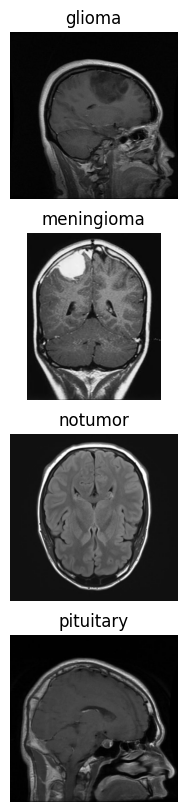

60 240
62 244
81 324
60 240


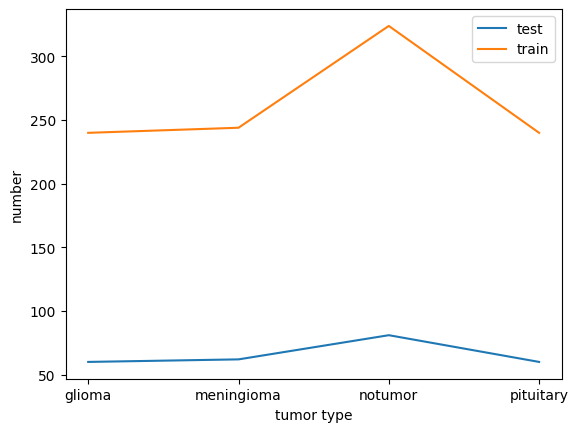

In [54]:
from torch.utils.data import DataLoader

tumor_type_img_list = []
tumor_type_img_list_size = []






dataset_train_list = []
dataset_test_list = []

fig , pics = plot.subplots(4 , 1 , figsize=(10, 10))
i=0



for i ,wtype in enumerate(tumor_type , 0):
  type_path = data_folder_path + "/" + wtype
  file_path_list = glob.glob(path.join(type_path, "*.jpg"))
  tumor_type_img_list_size.append(file_path_list.__len__())
  img1 = torchvision.io.read_image(file_path_list[0])

  dataset_train_list.append(MyDataset(i  , type_path , train_mode= True ,  train_test_ratio = 0.8))
  dataset_test_list.append(MyDataset( i , type_path , train_mode= False ,  train_test_ratio = 0.8))



  f = dataset_train_list[i].get(0)


  pics[i].imshow(f[0].permute(1, 2, 0) , cmap = 'gray')
  pics[i].set_title(tumor_type[f[1]])

  pics[i].axis('off')

  i +=1

plot.show()


dataloader_test_list = []
dataloader_train_list = []

test_number = []
train_number = []

for i in range(4):
  print(dataset_test_list[i].__len__() ,dataset_train_list[i].__len__() )
  test_number.append(dataset_test_list[i].__len__())
  train_number.append(dataset_train_list[i].__len__())

  dataloader_test_list.append(DataLoader(dataset_test_list[i] ,   batch_size= 16))
  dataloader_train_list.append(DataLoader(dataset_train_list[i] ,   batch_size= 16))



plot.plot(tumor_type , test_number , label = 'test')
plot.plot(tumor_type , train_number , label = 'train')

plot.xlabel('tumor type')
plot.ylabel('number')


plot.legend()
plot.show()












In [13]:



class CNN( nn.Module):
  def __init__ (self , regularization = False):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 1 , out_channels= 6 , kernel_size= 5)
    self.p1 = nn.MaxPool2d(2 ,  2 )
    self.conv2 = nn.Conv2d(6 , 16 , 5)
    self.p2  = nn.MaxPool2d(2 , 2)
    # self.conv3 = nn.Conv2d(16 ,  8 , 8)
    # self.p3 = nn.MaxPool2d(5 , 2)
    self.fc1 = nn.Linear(250000 , 512)
    self.fc2 = nn.Linear(512 , 64)
    self.fc3 = nn.Linear(64 , 4)

    self.s1 = nn.Sequential()
    self.reg = regularization
    self.dropout1 = nn.Dropout(p=0.1)
    self.dropout2 = nn.Dropout(p=0.1)
    self.dropout3 = nn.Dropout(p=0.1)

    # self.bn1 = nn.BatchNorm2d(6)
    # self.bn2 = nn.BatchNorm2d(16)







  def forward(self , x):
      x = self.p1(F.relu(self.conv1( x )))
      if self.reg:
        x = self.bn1(x)
      x = self.p2(F.relu(self.conv2( x )))
      # x = self.p3(F.relu(self.conv3( x )))
      if self.reg:
        x = self.bn2(x)
      x = torch.flatten(x , 1)
      # print(x.shape)
      x = F.relu(self.fc1(x))
      if self.reg :
        x = self.dropout1(x)
      x = F.relu(self.fc2(x))
      if self.reg :
        x = self.dropout2(x)
      x = self.fc3(x)
      if self.reg :
        x = self.dropout3(x)

      return x










model
<div dir="rtl", style = "white-space: pre-wrap">
در این مسئله تعداد داده ها و تعداد کلاس ها کم است پس نیازی نیست از مدل خیلی سنگین استفاده کنیم .
مدل LeNet-5 می تواند مدل مناسبی باشد زیرا تعداد پارامتر خیلی زیادی نداشته و از آن مدل نتیجه مناسبی گرفتیم
این مدل دو لایه کانولوشن و پولینگ
داریم که تعداد فیلتر های لایه اول 6و تعداد فیلتر های لایه دوم 16 است این مقدار فیلتر به علت ساده بودن مسئله مناسب مسئله ما به نظر می رسد

همچنین ابعاد هر دو کرنل برابر 5 قرار داده ایم زیرا افزایش سایز کرنل پارامتر ها و محاسبات را زیاد کرده و محاسبات زیاد ی شود همچنین به نظرم برای پیدا کردن الگو های این مسئله این سایز کرنل مناسب و کافی است

در این مسئله چون حاشیه های عکس اهمینت خاصی ندارند padding را در همه لایه ها برابر 0 قرار داده ایم

مقدار strid را هم در هر دو لایه pooling برابر 2قرار داده اهمچنین سایز آن را زیرا این کار باعث نصف شدن ابعاد در هر مرحله شده و بدین صورت هم تعداد پارامتر ها  کم شده هم در نهایت ویژگی های کلیدی استخراج می کنیم

و 3 لایه خطی دارد
در ابتدا یکی از اکتیویشن فانکشن های آن را تانژانت انتخاب کردیم زیرا که مقادیر را بین -1 و 1 مپ می کند اما نتیجه جالبی گرفته نشد زیرا تغیر فاصله اصلی بین مقادیر به نظر مناسب نمی آمد در نتیجه همه اکتیویشن فانکشن ها را relu  قرار دادیم خوبی این اکتیویشن فانکشن ساده بودن آن است و محاسبات را ساده کرده و مقادیر را تغیر نمی دهد(مقادیر مثبت)


لایه ها به ترتیب برابر 512 64 و 4 می باشد که برای اینکه به مرور ویژگی های کلیدی را استخراج کنیم آن را نزولی قرار داده ایم همچنین لایه آخر چون 4 کلاس داریم برابر 4 قرار داده شده است
</div>




In [8]:
def train(optimizer , lossfunc , mymodel):
  running_loss = 0.0
  total_correct = 0
  total = 0
  for e in range(4):
    label_name = tumor_type[e]
    temp = [0.0 , 0.0 , 0.0 , 0.0]
    temp[e] = 1.0
    output = torch.tensor(temp[e])
    for i, data in enumerate( dataloader_train_list[e] , 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mymodel(inputs)
        loss = lossfunc(outputs, labels)
        loss.backward()
        optimizer.step()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        total_correct += (predicted == labels).sum().item()


        running_loss += loss.item()

  return total_correct / total  , running_loss


In [11]:
def test(lossfunc , mymodel , output_list , label_list):
  correct = 0
  total = 0
  running_loss =0

  with torch.no_grad():
    for e in range(4):
      label_name = tumor_type[e]
      temp = [0.0 , 0.0 , 0.0 , 0.0]
      temp[e] = 1.0
      output = torch.tensor(temp[e])
      for i, data in enumerate( dataloader_test_list[e] , 0):
          images, labels = data

          outputs = mymodel(images)

          loss = lossfunc(outputs , labels)
          running_loss += loss.item()

          _, predicted = torch.max(outputs.data, 1)

          total += labels.size(0)
          for a in predicted:
            output_list.append(a.item())
            label_list.append(e)
          correct += (predicted == labels).sum().item()


  return correct / total , running_loss


ADAM algorithm
<div dir="rtl", style = "white-space: pre-wrap">
الگوریتم بهینه سازی آدام نسخه تعمیم یافته ی الگوریتم SGD می باشد
بر خلاف الگوریتم گرادیان کاهشی تصادفی که یک نرخ یادگیری برای تمام وزن ها دارد الگوریتم آدام در حین شروع آموزش نرخ یادگری را برای هر پارامتر تطبیق می دهد

ما در این پروژه از این بهینه ساز استفاده کردیم زیرا کارایی بهتری نسبت به SGD دارد و سرعت محاسبه آن هم نسبت به کارایی آن خیلی خوب است به خاطر این ویژگی ها تابع هزینه متداولی در cnn است
</div>


loss function
<div dir="rtl", style = "white-space: pre-wrap">
برای توابع هزینه می توان موارد زیر را نام برد

MSE که برابر مجموع مربعات اختلاف های با جواب نهایی است
خوبی این تابع این است که مشتق گرفتن از آن راحت تر است

RMSE که برابر رادیکال از عبارت MSE است
این تابع به دلیل گرفتن رادیکال مقدار لاس را نرمال تر می کند اما گرادیان گرفتن از آن به علت وجود رادیکال سخت تر است

MAE که برابر مجموع اختلاف ها است
این تابع چون حاوی قدر مطلق است مشتق گرفتن از آن سخت است اما خوبی آن محاسبه ساده آن است همچنین این تابع نسبت به داده های پرت مقاوم تر است در نتیجه وقتی داده پرت زیاد داریم این تابع می تواند کارایی مدل را بهتر کند

به طور کلی تابع MSE میانگین را کمینه کرده اما تابع MAE میانه را کمتر می کند


در این پروژه ما از تابع CrossEntropyLoss استفاده می کنیم زیرا این تابع برای استفاده از مسائل طبقه بندی مناسب است توابع نام برده شده توابع خطی هستند که برای داده های پیوسته مناسب اند اما ما در اینجا صرفا 4 حالت داریم پس از این   تابع هزینه استفاده می کنیم فایده آن لگاریتم گرفتن آن و درست کردن یک توزیع مناسب از احتمال هر کلاس است

batch
<div dir="rtl", style = "white-space: pre-wrap">
با این کار سرعت محاسبات ما افزایش می یابد مخصوصا وقتی ما از کارت گرافیک استفاده می کنیم این کار ورودی را به صورت ماتریسی به مدل می دهد و چون ماتریس است پردازنده می تواند به صورت موازی محاسبات را انجام دهد
ما عدد 16 را برای بچ انتخاب کرده ایم زیرا تعداد زیاد بچ باعث می شود که مموری زیادی در گیر شود همچنین فرصت برای بهبود ضرایب کاهش می یابد که باعث کاهش دقت مدل شده تعداد بچ پایین هم سرعت محاسبات را پایین می آورد در نتیجه مقدار 16 که متوسط می باشد انتخاب شده است



دیتا لودر گفته شده بالا تر تعریف شده است

In [ ]:

mymodel = CNN()
lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(mymodel.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(mymodel.parameters() , lr = 0.001 )
PATH = '/content/drive/MyDrive/path_param.pth'
torch.save(mymodel.state_dict(), PATH)

epoch_list = []
loss_test_list = []
loss_train_list = []
acc_test_list = []
acc_train_list = []


for epoch in range(20):  # loop over the dataset multiple times
    epoch_list.append(epoch)

    print("epoch " , epoch)
    acc , lossval = train( optimizer , lossfunc , mymodel)

    print("train -> accuracy:" , acc , "   loss:" , lossval )
    loss_train_list.append(lossval)
    acc_train_list.append(acc)
    torch.save(mymodel.state_dict(), PATH)
    acc , lossval = test(lossfunc , mymodel)
    loss_test_list.append(lossval)
    acc_test_list.append(acc)
    print("test -> accuracy:" , acc , "   loss:" , lossval )

print('Finished Training')



epoch  0
train -> accuracy: 0.5906488549618321    loss: 69585.55048687596
test -> accuracy: 0.22813688212927757    loss: 1150.2007352039218
epoch  1
train -> accuracy: 0.3330152671755725    loss: 1350.5383252783213
test -> accuracy: 0.19391634980988592    loss: 24.474097967147827
epoch  2
train -> accuracy: 0.31202290076335876    loss: 103.14510783739388
test -> accuracy: 0.23193916349809887    loss: 220.5308274347335
epoch  3
train -> accuracy: 0.20038167938931298    loss: 107.05307334661484
test -> accuracy: 0.3916349809885932    loss: 22.162177085876465
epoch  4
train -> accuracy: 0.6030534351145038    loss: 161.13272887889616
test -> accuracy: 0.23954372623574144    loss: 79.54382484778762
epoch  5
train -> accuracy: 0.3053435114503817    loss: 133.1540629863739
test -> accuracy: 0.33079847908745247    loss: 22.206033289432526
epoch  6
train -> accuracy: 0.3482824427480916    loss: 78.07497900724411
test -> accuracy: 0.3726235741444867    loss: 20.69093954563141
epoch  7
train -> a

In [10]:
class Result(nn.Module):
  def __init__(self ,  a , b, c , d=None , a2 = None , b2 = None , c2 = None , d2 = None):
    self.a=a.copy()
    self.b= b.copy()
    self.c = c.copy()
    if(d):
      self.d = d.copy()

    if(a2):
      self.a2=a2.copy()
    if(b2):
      self.b2= b2.copy()
    if(c2):
      self.c2 = c2.copy()
    if(d2):
      self.d2 = d2.copy()


In [ ]:




re = Result(epoch_list,
loss_test_list,
loss_train_list,
acc_test_list,
acc_train_list)

torch.save(re, 'result_list.pth')


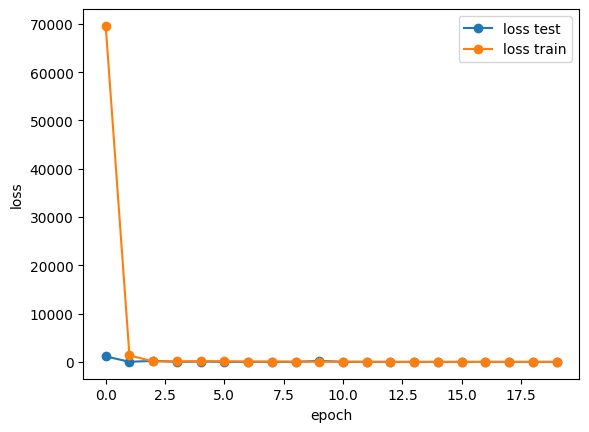

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:

re = torch.load('result_list.pth')
epoch_list = re.a
loss_test_list = re.b
loss_train_list = re.c
acc_test_list = re.d
acc_train_list = re.a2

plot.plot(epoch_list ,   loss_test_list , label = 'loss test' , marker= 'o')
plot.plot(epoch_list ,  loss_train_list , label = 'loss train' , marker ='o')

plot.xlabel('epoch')
plot.ylabel('loss')
plot.xlim
plot.legend()
plot.show()
print(epoch_list)

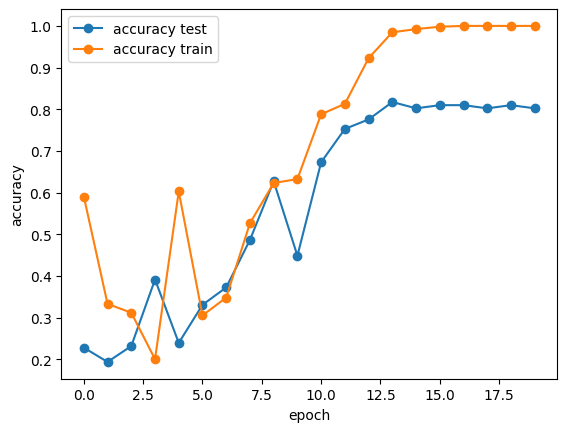

In [ ]:
plot.plot(epoch_list ,   acc_test_list , label = 'accuracy test' , marker= 'o')
plot.plot(epoch_list ,  acc_train_list , label = 'accuracy train' , marker ='o')

plot.xlabel('epoch')
plot.ylabel('accuracy')
plot.xlim
plot.legend()
plot.show()


In [ ]:
dataloader_test_list_reg = []
dataloader_train_list_reg = []


for i in range(4):
  print(dataset_test_list[i].__len__() ,dataset_train_list[i].__len__() )
  dataloader_test_list_reg.append(DataLoader(dataset_test_list[i] ,   batch_size= 16))
  dataloader_train_list_reg.append(DataLoader(dataset_train_list[i] ,   batch_size= 16))



60 240
62 244
81 324
60 240


drop out
<div dir="rtl", style = "white-space: pre-wrap">
یکی از دلایل اورفیت می تواند این باشد که در بخش ترین ما فقط از چند نورون استفاده کنیم و بعضی از نورون ها اصلا استفاده نشود برای درست شدن این مشکل هر از چند گاهی بعضی از نورون ها را غیر فعال کرده که باقی به کار بیفتند
ما این احتمال را برابر 0.1 قرار دادیم زیرا در صورت زیاد گذاشتن آن امکان داشت دفعات غیر فعال شدن کاهش یافته در نتیجه مدل دیر تر به نتیجه برسد


</div>


batch normalization
<div dir="rtl", style = "white-space: pre-wrap">
این کار باعث می شود که خروجی لایه های کانولوشن در محدوده نرمال بماند
پارامتر های این قسمت باید برابر تعداد channel ها در هر لایه باشد
که به ترتیب برابر 6 و 16 می باشد
</div>

In [ ]:

mymodel_res = CNN(True)
lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(mymodel.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(mymodel_res.parameters() , lr = 0.001 )
PATH = '/content/drive/MyDrive/path_param_res.pth'
torch.save(mymodel_res.state_dict(), PATH)

epoch_list_res = []
loss_test_list_res = []
loss_train_list_res = []
acc_test_list_res = []
acc_train_list_res = []
total_output_list_res = []
total_label_list_res = []

for epoch in range(20):  # loop over the dataset multiple times
    epoch_list_res.append(epoch)

    print("epoch " , epoch)
    acc , lossval = train( optimizer , lossfunc , mymodel_res)

    print("train -> accuracy:" , acc , "   loss:" , lossval )
    loss_train_list_res.append(lossval)
    acc_train_list_res.append(acc)
    torch.save(mymodel_res.state_dict(), PATH)
    acc , lossval = test(lossfunc , mymodel_res , total_output_list_res , total_label_list_res)
    loss_test_list_res.append(lossval)
    acc_test_list_res.append(acc)
    print("test -> accuracy:" , acc , "   loss:" , lossval )
    print(total_output_list_res)

print('Finished Training')
re = Result(epoch_list_res,
loss_test_list_res,
loss_train_list_res,
acc_test_list_res,
acc_train_list_res)

torch.save(re, 'result_list_res.pth')


epoch  0
train -> accuracy: 0.767175572519084    loss: 1527.2088552064797
test -> accuracy: 0.22433460076045628    loss: 1397.0691945291994
[tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), t

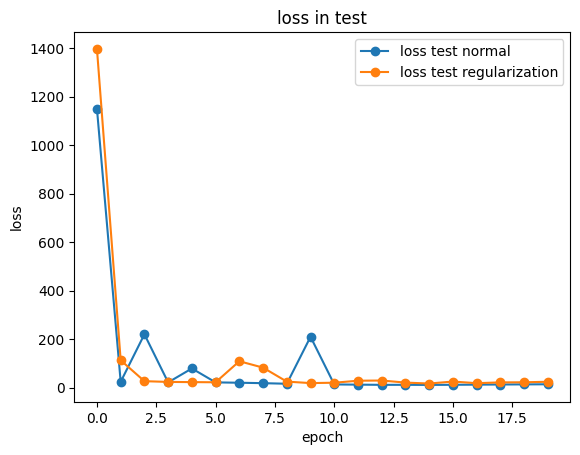

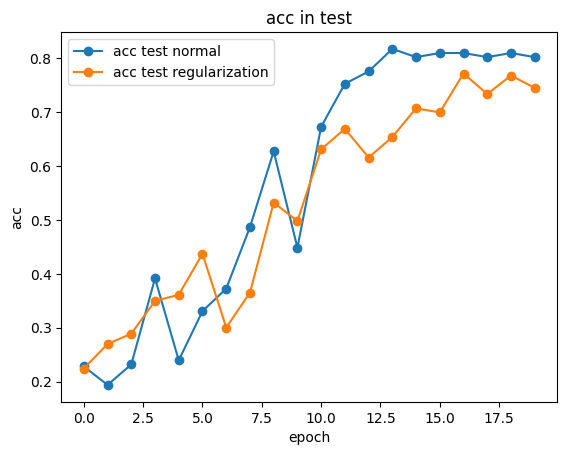

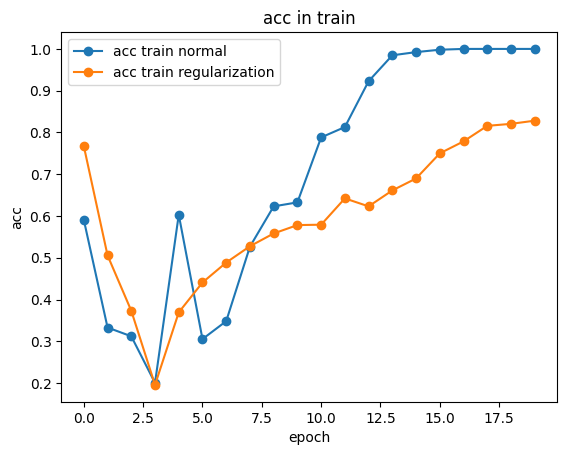

In [13]:
re = torch.load('/content/result_list_res.pth')
epoch_list_res = re.a
loss_test_list_res = re.b
loss_train_list_res = re.c
acc_test_list_res = re.d
acc_train_list_res = re.a2

re = torch.load('/content/result_list.pth')
epoch_list = re.a
loss_test_list = re.b
loss_train_list = re.c
acc_test_list = re.d
acc_train_list = re.a2



plot.plot(epoch_list ,   loss_test_list , label = 'loss test normal' , marker= 'o')
plot.plot(epoch_list ,  loss_test_list_res , label = 'loss test regularization' , marker ='o')

plot.xlabel('epoch')
plot.ylabel('loss')
plot.xlim
plot.title('loss in test')
plot.legend()
plot.show()



plot.plot(epoch_list ,   acc_test_list , label = 'acc test normal' , marker= 'o')
plot.plot(epoch_list ,  acc_test_list_res , label = 'acc test regularization' , marker ='o')

plot.xlabel('epoch')
plot.ylabel('acc')
plot.title('acc in test')

plot.xlim
plot.legend()
plot.show()



plot.plot(epoch_list ,   acc_train_list , label = 'acc train normal' , marker= 'o')
plot.plot(epoch_list ,  acc_train_list_res , label = 'acc train regularization' , marker ='o')

plot.xlabel('epoch')
plot.ylabel('acc')
plot.title('acc in train')

plot.xlim
plot.legend()
plot.show()


مقایسه:


 میبینیم که در روش رگولاریزیشن
 داده های ترین ما در 20 بار ترین و تست به درصد 80 رسیده است اما در حالت عادی 1 شده بود این نشان دهنده این است که اگر در مدل دوم به تعداد بیشتری ایتریت کنیم مدل بهتر می شود اما در مدل اول چون مدل روی ترین فیت شده است دقت از 80 درصد دیگر بیشتر نخواهد شد

In [29]:

from sklearn.metrics import (
    classification_report, precision_recall_fscore_support,
    accuracy_score, top_k_accuracy_score, f1_score,
    matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
)



mymodel = CNN()
#mymodel_reg = CNN(True)

mymodel.load_state_dict(torch.load('/content/drive/MyDrive/path_param1.pth'))
total_correct = []
total_ans = []



lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(mymodel.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(mymodel_res.parameters() , lr = 0.001 )

acc , lossval =  test(lossfunc , mymodel , total_correct , total_ans)






/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [30]:
print(acc , lossval)

0.8022813688212928 14.326750703155966


In [ ]:
#!pip install -U scikit-learn

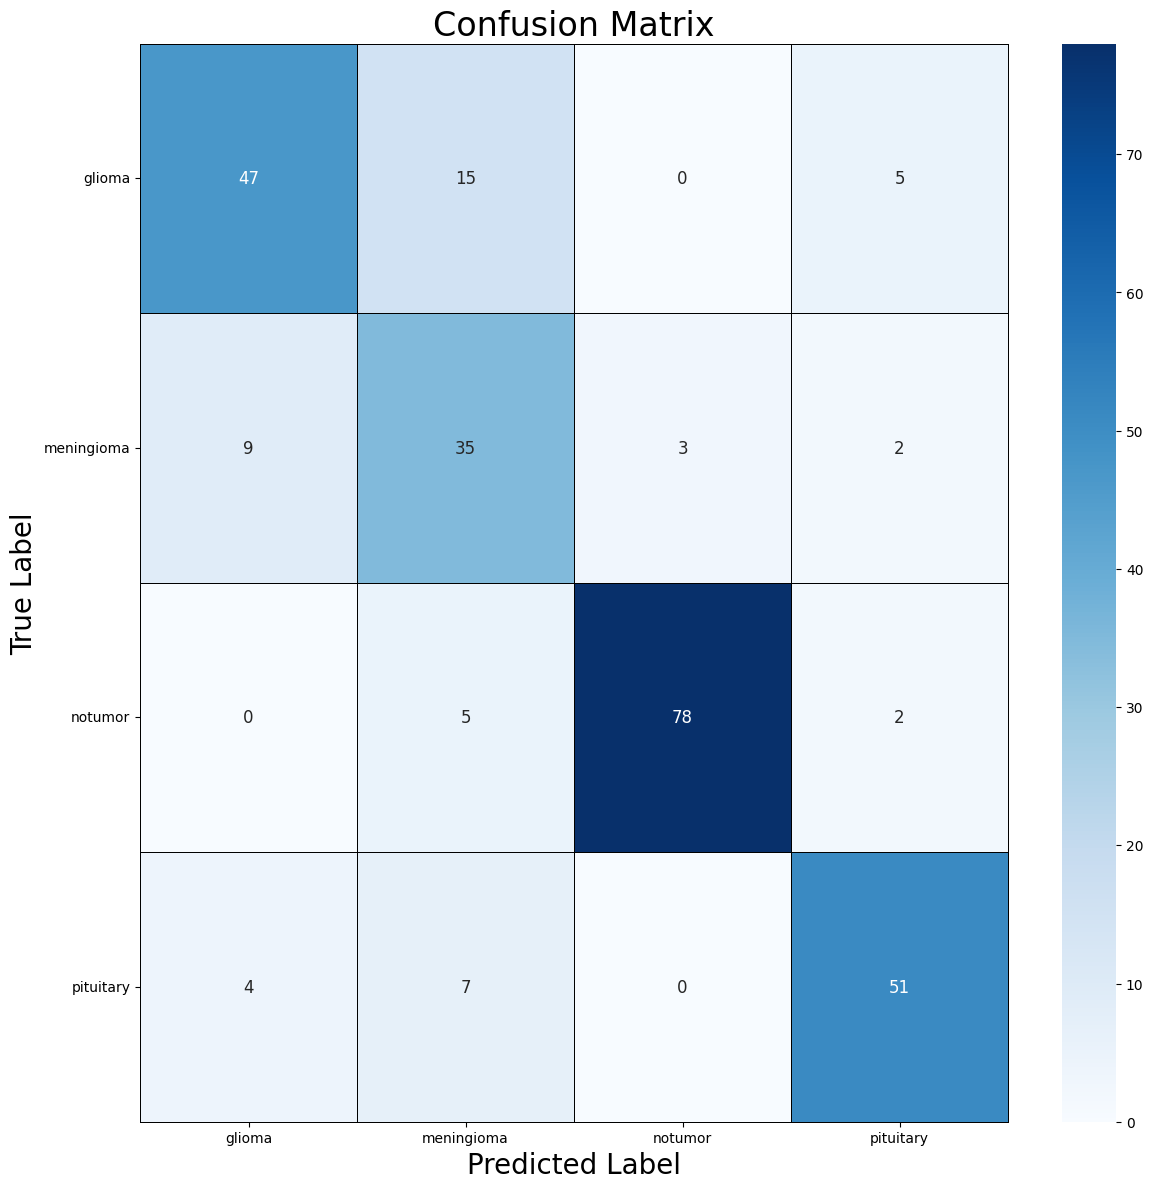

In [35]:
import seaborn as sns



cm = confusion_matrix(total_correct, total_ans)


plot.figure(figsize=(14 ,14))


disp = sns.heatmap(
    cm, annot=True, cmap='Blues',
    annot_kws={"size": 12}, fmt='g',
    linewidths=0.5, linecolor='black', clip_on=False,
    xticklabels=tumor_type, yticklabels=tumor_type)

disp.set_title('Confusion Matrix', fontsize=24)
disp.set_xlabel('Predicted Label', fontsize=20)
disp.set_ylabel('True Label', fontsize=20)
plot.yticks(rotation=0)

  # Plot confusion matrix
plot.show()



In [37]:
print(classification_report( total_correct , total_ans,target_names=tumor_type))


              precision    recall  f1-score   support

      glioma       0.78      0.70      0.74        67
  meningioma       0.56      0.71      0.63        49
     notumor       0.96      0.92      0.94        85
   pituitary       0.85      0.82      0.84        62

    accuracy                           0.80       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.82      0.80      0.81       263



confusion matrix

<div dir="rtl", style = "white-space: pre-wrap">
 با برسی آن میبینیم که مدل در تشخیص نداشتن تومور بهتر از تشخیص  
نوع تومور عمل کرده است

همچنین دو نوع اول تومور بیشتر شبیه یک دیگر هستند زیرا مدل بین این بیشتر اشتباه کرده است